<a href="https://colab.research.google.com/github/murigugitonga/math_4_ai/blob/dev/03_calculus%5C03_partial_derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus - Partial Derivatives

**Objective:** Understand partial derivatives and how they describe the sensitivity
of functions with multiple variables. Connect this directly to ML optimization.

## 1. Intuition

A **partial derivative** measures the change of a function with respect to **one variable at a time**, keeping other variables fixed.

- Think of a surface in 3D: z = f(x, y)
- Partial derivative w.r.t x → slope along x, holding y constant
- Partial derivative w.r.t y → slope along y, holding x constant

In AI:
- Each parameter (weight) has its **own derivative**
- Training adjusts all parameters using their partial derivatives


## 2. Mathematical Definition

For a function of two variables:

\[
f(x, y)
\]

Partial derivatives:

\[
\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x + h, y) - f(x, y)}{h}
\]

\[
\frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x, y + h) - f(x, y)}{h}
\]

- Each derivative considers one variable changing
- Others stay constant


In [3]:
import numpy as np

def numerical_partial(f, x, y, h=1e-5):
  df_dx = (f(x + h, y) - f(x, y)) / h
  df_dy = (f(x, y+h) -f(x,y)) / h
  return df_dx, df_dy

def f(x,y):
  return x**2 + y**3

x0, y0 = 1.0, 2.0
numerical_partial(f, x0, y0)

(2.0000100001027477, 12.000060000261213)

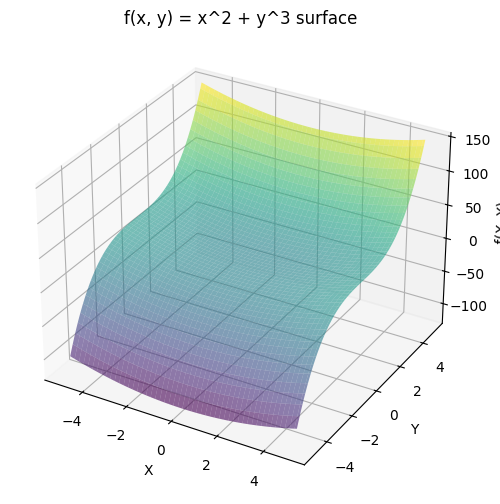

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
ax.set_title("f(x, y) = x^2 + y^3 surface")
plt.show()

## 6. Connection to ML

- ML models have **many weights**: w1, w2, ..., wn
- Loss = L(w1, w2, ..., wn)
- Partial derivatives tell us:

\[
\frac{\partial L}{\partial w_i}
\]

- Each weight update = learning rate × partial derivative
- All updates together = gradient descent


In [5]:
def loss(w1, w2, x=1.0, y_true = 2.0):
  y_pred = w1 * x + w2*x**2
  return (y_true - y_pred)**2

  # Numerical partials
  w1,w2 = 0.5, -0.5
  numerical_partial(loss, w1, w2)

## 9. Key Takeaways

- Partial derivatives measure change with respect to **one variable**
- They allow multi-parameter optimization
- Each model weight has its own derivative
- Gradient descent depends on partial derivatives
- Visualization helps intuition
